In [1]:
import numpy as np
import pandas as pd
import gtda
import matplotlib.pyplot as plt

# Series de Tiempo de Contaminantes para la CDMX

A continuación estudiaremos una base de datos con algunos contaminantes de la CDMX. La base de datos se encuentra en el archivo `contaminantes_CDMX.csv` y contiene las siguientes columnas:

- `fecha`: Fecha de la medición
- `NO`: Monóxido de Nitrógeno
- `NO.1`: Dióxido de Nitrógeno
- `O3`: Ozono
- `PM10`: Partículas menores a 10 micras
- `PM25`: Partículas menores a 2.5 micras
- `SO2`: Dióxido de Azufre
- `Ln_PM10`: Logaritmo natural de PM10

Queremos conocer si existen recurrencia entre nuestras mediciones.

In [2]:
contaminants = pd.read_csv('contaminantes_CDMX.csv')

In [3]:
contaminants.head()

,Fecha,NO,NO.1,O3,PM10,PM25,SO2,Ln_PM10
0,01/01/2020,7,25,29,13,10,6,2.564949
1,02/01/2020,1,2,54,4,2,5,1.386294
2,03/01/2020,1,3,76,12,2,4,2.484907
3,04/01/2020,1,3,56,4,2,4,1.386294
4,05/01/2020,2,1,53,6,3,2,1.791759


Veamos si la fecha es un timestamp de pandas

In [4]:

contaminants.dtypes

Fecha       object
NO           int64
NO.1         int64
O3           int64
PM10         int64
PM25         int64
SO2          int64
Ln_PM10    float64
dtype: object

No lo es, por lo que cambiaremos a timestamp para su manejo más eficiente.

In [5]:
contaminants['Fecha'] = pd.to_datetime(contaminants['Fecha'])

C:\Users\alejandro.murcia\AppData\Local\Temp\ipykernel_54908\1586979963.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  contaminants['Fecha'] = pd.to_datetime(contaminants['Fecha'])


In [6]:
PM10 = pd.Series(contaminants['PM10'])

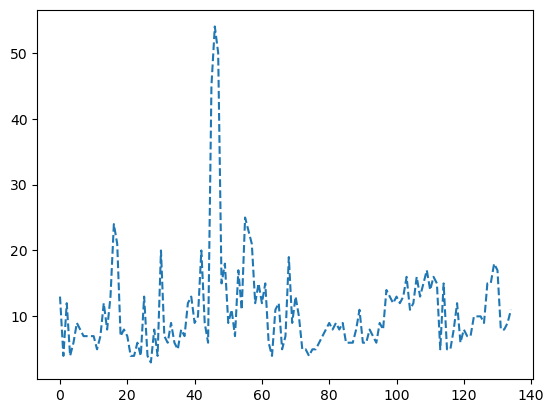

In [7]:
 plt.plot(PM10, '--', label='ML Predictions')

In [8]:
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
import plotly.graph_objects as go
from gtda.plotting import plot_point_cloud

In [9]:
PM10[1]

4

In [10]:
x_contaminantes = PM10.index
y_contaminantes = [PM10[i] for i in x_contaminantes]

# Escogemos nuestros parametros para el encaje
# d= embedding_dimension_periodic
# tau = embedding_time_delay_periodic
# stride = nos permite tomar un subconjunto de los datos.
embedding_dimension_periodic = 3
embedding_time_delay_periodic = 30
stride = 1

# Modifica el `stride` y el `delay` para obtener diferentes encajes, de lo anterior.

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(y_contaminantes)
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

Shape of embedded time series: (75, 3)


In [11]:
plot_point_cloud(y_periodic_embedded)

In [12]:
from gtda.homology import VietorisRipsPersistence

y_periodic_embedded = y_periodic_embedded[None, :, :]
# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

contaminantes_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=1
)
print("Persistence diagram for periodic signal")
contaminantes_persistence.fit_transform_plot(y_periodic_embedded)

Persistence diagram for periodic signal


array([[[ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  2.        ,  0.        ],
        [ 0.        ,  2.        ,  0.        ],
        [ 0.        ,  2.        ,  0.        ],
        [ 0.        ,  2.        ,  0.        ],
        [ 0.        

## Hacer Ln PM10 y O3

### $ln (PM_{10})$

In [13]:
ln_PM10 = pd.Series(contaminants['Ln_PM10'])

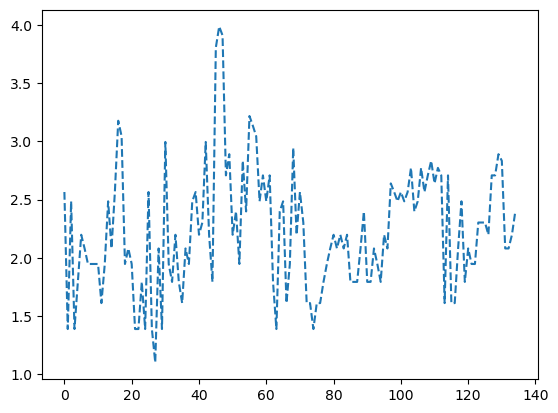

In [14]:
plt.plot(ln_PM10, '--', label='ML Predictions')

In [22]:
x_contaminantes = ln_PM10.index
y_contaminantes = [ln_PM10[i] for i in x_contaminantes]

# Escogemos nuestros parametros para el encaje
# d= embedding_dimension_periodic
# tau = embedding_time_delay_periodic
# stride = nos permite tomar un subconjunto de los datos.
embedding_dimension_periodic = 3
embedding_time_delay_periodic = 30
stride = 1

# Modifica el `stride` y el `delay` para obtener diferentes encajes, de lo anterior.

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(y_contaminantes)
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

Shape of embedded time series: (75, 3)


In [23]:
plot_point_cloud(y_periodic_embedded)

In [24]:
from gtda.homology import VietorisRipsPersistence

y_periodic_embedded = y_periodic_embedded[None, :, :]
# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

contaminantes_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=1
)
print("Persistence diagram for periodic signal")
contaminantes_persistence.fit_transform_plot(y_periodic_embedded)

Persistence diagram for periodic signal


array([[[0.        , 0.08338161, 0.        ],
        [0.        , 0.10536052, 0.        ],
        [0.        , 0.11778303, 0.        ],
        [0.        , 0.12427659, 0.        ],
        [0.        , 0.13430586, 0.        ],
        [0.        , 0.14240673, 0.        ],
        [0.        , 0.14240673, 0.        ],
        [0.        , 0.14310084, 0.        ],
        [0.        , 0.15415068, 0.        ],
        [0.        , 0.19521862, 0.        ],
        [0.        , 0.19911802, 0.        ],
        [0.        , 0.20067069, 0.        ],
        [0.        , 0.20394377, 0.        ],
        [0.        , 0.21057537, 0.        ],
        [0.        , 0.21219978, 0.        ],
        [0.        , 0.21439242, 0.        ],
        [0.        , 0.22314355, 0.        ],
        [0.        , 0.22527499, 0.        ],
        [0.        , 0.22536489, 0.        ],
        [0.        , 0.23871939, 0.        ],
        [0.        , 0.23873581, 0.        ],
        [0.        , 0.23928827, 0

### $O_{3}$

In [28]:
ozone = pd.Series(contaminants['O3'])

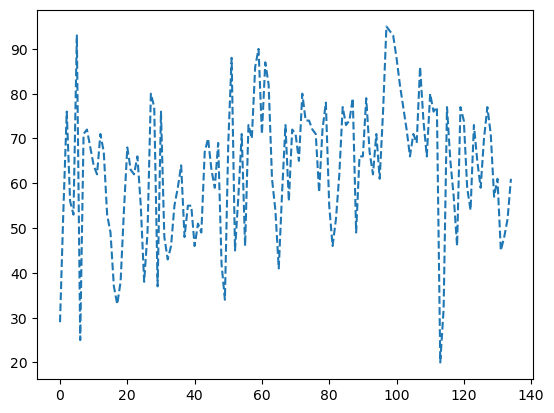

In [29]:
plt.plot(ozone, '--', label='ML Predictions')

In [49]:
x_contaminantes = ozone.index
y_contaminantes = [ozone[i] for i in x_contaminantes]

# Escogemos nuestros parametros para el encaje
# d= embedding_dimension_periodic
# tau = embedding_time_delay_periodic
# stride = nos permite tomar un subconjunto de los datos.
embedding_dimension_periodic = 3
embedding_time_delay_periodic = 30
stride = 1

# Modifica el `stride` y el `delay` para obtener diferentes encajes, de lo anterior.

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(y_contaminantes)
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

Shape of embedded time series: (75, 3)


In [50]:
plot_point_cloud(y_periodic_embedded)

In [51]:
from gtda.homology import VietorisRipsPersistence

y_periodic_embedded = y_periodic_embedded[None, :, :]
# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

contaminantes_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=1
)
print("Persistence diagram for periodic signal")
contaminantes_persistence.fit_transform_plot(y_periodic_embedded)

Persistence diagram for periodic signal


array([[[ 0.        ,  3.1622777 ,  0.        ],
        [ 0.        ,  3.7416575 ,  0.        ],
        [ 0.        ,  4.12310553,  0.        ],
        [ 0.        ,  4.12310553,  0.        ],
        [ 0.        ,  4.2426405 ,  0.        ],
        [ 0.        ,  4.35889912,  0.        ],
        [ 0.        ,  4.5825758 ,  0.        ],
        [ 0.        ,  4.5825758 ,  0.        ],
        [ 0.        ,  5.        ,  0.        ],
        [ 0.        ,  5.09901953,  0.        ],
        [ 0.        ,  5.19615221,  0.        ],
        [ 0.        ,  5.83095169,  0.        ],
        [ 0.        ,  5.83095169,  0.        ],
        [ 0.        ,  5.83095169,  0.        ],
        [ 0.        ,  6.3245554 ,  0.        ],
        [ 0.        ,  6.40312433,  0.        ],
        [ 0.        ,  6.40312433,  0.        ],
        [ 0.        ,  6.40312433,  0.        ],
        [ 0.        ,  6.48074055,  0.        ],
        [ 0.        ,  6.70820379,  0.        ],
        [ 0.        

Con base con los gráficos de persistencia observados, en el caso de $Ln PM10$, observamos persistencia únicamente en la componente conexa, sin embargo, no observamos persistencia en los huecos para poder concluir que existe periodicidad. En el caso de $O_3$, observamos una componente conexa persistente, pero no podemos concluir que haya periodicidad, ya que, de haber huecos, habrían al menos dos de ellos, lo que nos lleva a pensar que debe de haber al menos dos períodos. 